In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import geopandas as gpd

In [ ]:
file_path_data_1 = '/content/micro_world_139countries.csv'

In [ ]:
data = pd.read_csv(file_path_data_1, encoding="latin1")
data.head(3)

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig,year
0,Afghanistan,AFG,South Asia,22647496.0,144274031,0.716416,2,43.0,2,4,...,4,4,4.0,1,5.0,1,2,1,0.0,2021
1,Afghanistan,AFG,South Asia,22647496.0,180724554,0.497408,2,55.0,1,3,...,4,4,2.0,4,5.0,1,2,0,0.0,2021
2,Afghanistan,AFG,South Asia,22647496.0,130686682,0.650431,1,15.0,1,2,...,4,4,4.0,4,3.0,2,2,0,0.0,2021


In [ ]:
print(f'Dataset size : {data.shape}')

Dataset size : (143887, 128)


In [ ]:
data.describe()

,pop_adult,wpid_random,wgt,female,age,educ,inc_q,emp_in,urbanicity_f2f,account,...,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig,year
count,1.438870e+05,1.438870e+05,143887.000000,143887.000000,143420.000000,143887.000000,143887.000000,140385.000000,75644.000000,143887.000000,...,143887.000000,143887.000000,114281.000000,143887.000000,114281.000000,143887.000000,143887.000000,143887.000000,114281.000000,143887.000000
mean,7.412421e+07,1.611899e+08,1.000000,1.467742,41.056889,1.968204,3.234239,1.339965,1.579861,0.708646,...,3.508156,3.687171,3.715998,2.570010,3.707020,1.121151,1.303780,0.648856,0.325032,2021.111428
std,2.253154e+08,2.886117e+07,0.807425,0.498960,17.342777,0.723923,1.419803,0.473699,0.493584,0.454388,...,1.074664,0.894404,0.760554,1.328046,1.731587,0.333529,0.474689,0.477329,0.468389,0.314662
min,2.952496e+05,1.111118e+08,0.131675,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2021.000000
25%,4.609787e+06,1.361950e+08,0.437501,1.000000,27.000000,1.000000,2.000000,1.000000,1.000000,0.000000,...,4.000000,4.000000,4.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,2021.000000
50%,9.612429e+06,1.613316e+08,0.756633,1.000000,38.000000,2.000000,3.000000,1.000000,2.000000,1.000000,...,4.000000,4.000000,4.000000,2.000000,5.000000,1.000000,1.000000,1.000000,0.000000,2021.000000
75%,3.371732e+07,1.861962e+08,1.283792,2.000000,54.000000,2.000000,5.000000,2.000000,2.000000,1.000000,...,4.000000,4.000000,4.000000,4.000000,5.000000,1.000000,2.000000,1.000000,1.000000,2021.000000
max,1.153773e+09,2.111102e+08,6.245670,2.000000,99.000000,5.000000,5.000000,2.000000,2.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,4.000000,1.000000,1.000000,2022.000000


In [ ]:
print(data.shape)
data.isnull().sum()

(143887, 128)


,0
economy,0
economycode,0
regionwb,1000
pop_adult,0
wpid_random,0
...,...
mobileowner,0
internetaccess,0
anydigpayment,0
merchantpay_dig,29606


<ipython-input-34-95c130ee3503>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='anydigpayment', data= data, ax=axes[0], palette='coolwarm')


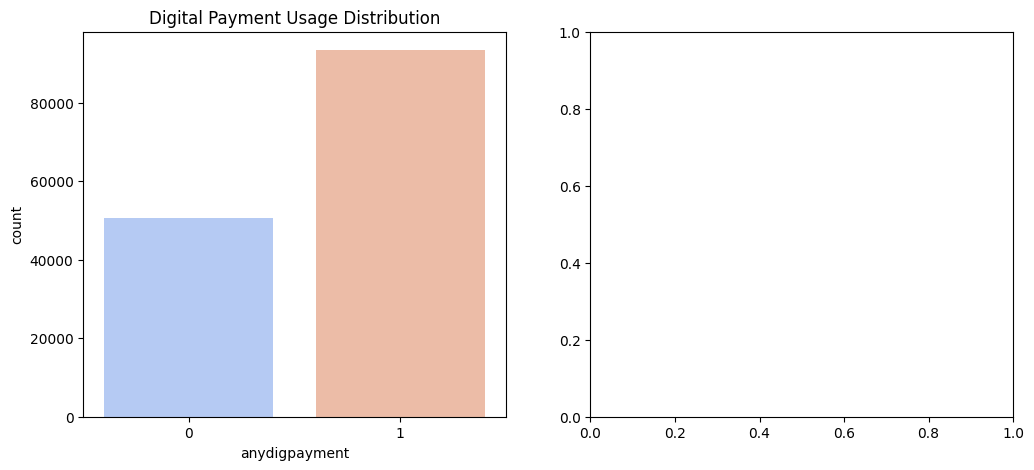

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='anydigpayment', data= data, ax=axes[0], palette='coolwarm')
axes[0].set_title("Digital Payment Usage Distribution")
plt.show()

## Important features and targets

In [ ]:
important_features = ['account','receive_transfers', 'receive_pension', 'receive_agriculture',
                      'emp_in', 'inc_q', 'mobileowner', 'internetaccess',
                      'merchantpay_dig', 'age', 'female', 'urbanicity_f2f']

targets = ['anydigpayment', 'borrowed']

relevant_columns = [col for col in important_features] + targets
corr_matrix = data[relevant_columns].corr()
print(corr_matrix)

                      account  receive_transfers  receive_pension  \
account              1.000000          -0.237372        -0.181089   
receive_transfers   -0.237372           1.000000         0.165900   
receive_pension     -0.181089           0.165900         1.000000   
receive_agriculture  0.007195           0.000800        -0.015735   
emp_in              -0.139577           0.008935        -0.231231   
inc_q                0.153553           0.053125        -0.011654   
mobileowner         -0.317072           0.092196         0.039588   
internetaccess      -0.382080           0.128698         0.040625   
merchantpay_dig      0.521412          -0.211117        -0.087041   
age                  0.149598          -0.066753        -0.419550   
female               0.090849           0.015697         0.010419   
urbanicity_f2f       0.117530          -0.038056        -0.037543   
anydigpayment        0.871620          -0.270772        -0.205843   
borrowed             0.173146     

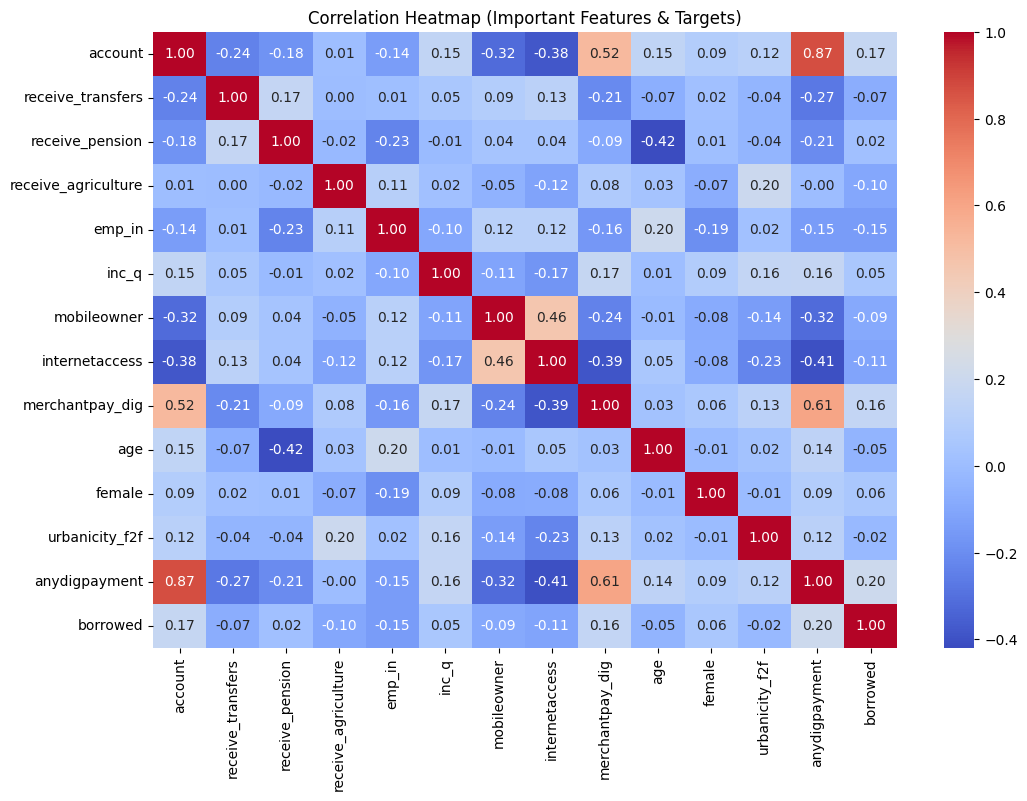

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap (Important Features & Targets)")
plt.show()

In [ ]:
missing_values = data.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(data)) * 100

In [ ]:
threshold = 50
columns_to_drop = missing_percentage[missing_percentage > threshold].index

In [ ]:
len(columns_to_drop)

64

In [ ]:
for col in important_features:
  if col in columns_to_drop:
    print('Ah shit')

In [ ]:
data_cleaned = data.drop(columns=columns_to_drop)
data_cleaned.head()

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig,year
0,Afghanistan,AFG,South Asia,22647496.0,144274031,0.716416,2,43.0,2,4,...,4,4,4.0,1,5.0,1,2,1,0.0,2021
1,Afghanistan,AFG,South Asia,22647496.0,180724554,0.497408,2,55.0,1,3,...,4,4,2.0,4,5.0,1,2,0,0.0,2021
2,Afghanistan,AFG,South Asia,22647496.0,130686682,0.650431,1,15.0,1,2,...,4,4,4.0,4,3.0,2,2,0,0.0,2021
3,Afghanistan,AFG,South Asia,22647496.0,142646649,0.991862,2,23.0,1,4,...,4,4,2.0,4,5.0,1,2,0,0.0,2021
4,Afghanistan,AFG,South Asia,22647496.0,199055310,0.554940,1,46.0,1,1,...,4,4,4.0,4,5.0,2,2,0,0.0,2021


In [ ]:
# Filling numerical missing values with median
data_cleaned[important_features] = data_cleaned[important_features].apply(lambda x: x.fillna(x.median()) if x.dtype != 'O' else x)

# Filling categorical missing values with mode
data_cleaned[important_features] = data_cleaned[important_features].apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == 'O' else x)

In [ ]:
numerical_cols = data_cleaned.select_dtypes(include=np.number).columns.tolist()

Q1 = data_cleaned[numerical_cols].quantile(0.25)
Q3 = data_cleaned[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
data_cleaned = data_cleaned[~((data_cleaned[numerical_cols] < lower_bound) | (data_cleaned[numerical_cols] > upper_bound)).any(axis=1)]

In [ ]:
categorical_cols = data_cleaned.drop(numerical_cols, axis = 1)

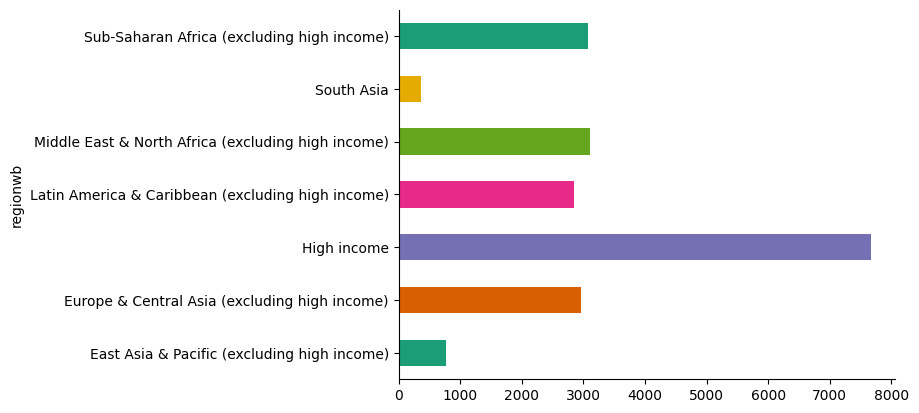

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
categorical_cols.groupby('regionwb').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
numerical_features = ['age']  # Add more if needed
data_cleaned[numerical_features] = (data_cleaned[numerical_features] - data_cleaned[numerical_features].min()) / (data_cleaned[numerical_features].max() - data_cleaned[numerical_features].min())

<ipython-input-74-1236ea24db9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[numerical_features] = (data_cleaned[numerical_features] - data_cleaned[numerical_features].min()) / (data_cleaned[numerical_features].max() - data_cleaned[numerical_features].min())


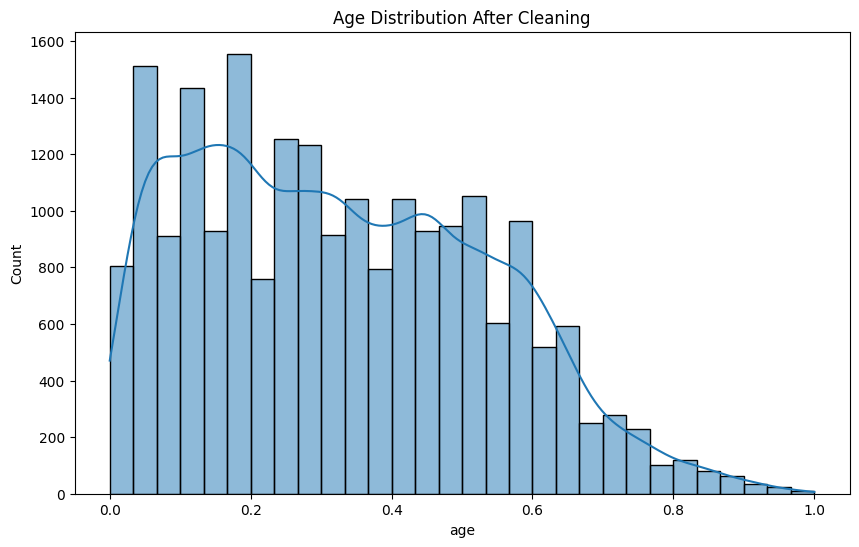

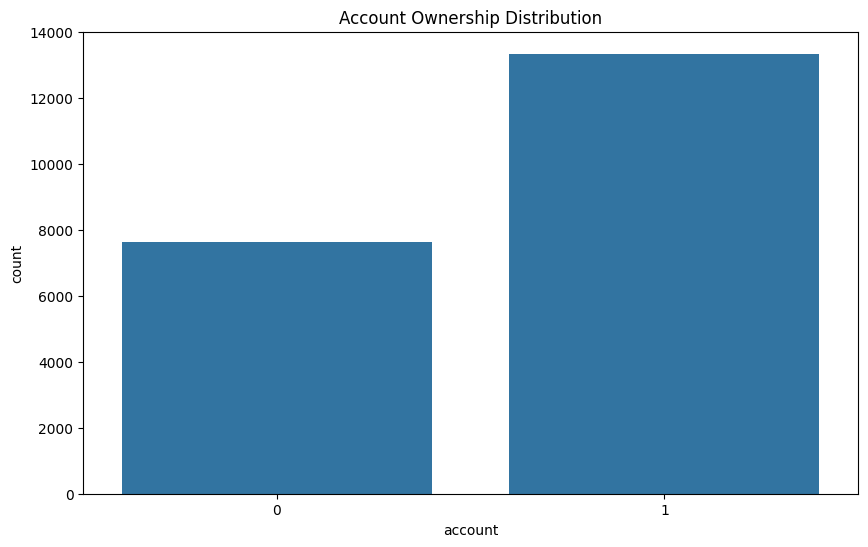

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['age'], bins=30, kde=True)
plt.title("Age Distribution After Cleaning")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x=data_cleaned['account'])
plt.title("Account Ownership Distribution")
plt.show()

In [ ]:
data_cleaned.columns

Index(['economy', 'economycode', 'regionwb', 'pop_adult', 'wpid_random', 'wgt',
       'female', 'age', 'educ', 'inc_q', 'emp_in', 'urbanicity_f2f', 'account',
       'account_fin', 'account_mob', 'fin2', 'fin4', 'fin5', 'fin6', 'fin7',
       'fin9', 'fin10', 'fin10b', 'fin14_1', 'fin14a', 'fin14a1', 'fin14b',
       'fin16', 'fin17a', 'fin17b', 'fin20', 'fin22a', 'fin22b', 'fin24',
       'fin24a', 'fin24b', 'fin26', 'fin28', 'fin30', 'fin31a', 'fin31b',
       'fin32', 'fin37', 'fin38', 'fin42', 'fin44a', 'fin44b', 'fin44c',
       'fin44d', 'fin45', 'fin45_1', 'saved', 'borrowed', 'receive_wages',
       'receive_transfers', 'receive_pension', 'receive_agriculture',
       'pay_utilities', 'remittances', 'mobileowner', 'internetaccess',
       'anydigpayment', 'merchantpay_dig', 'year'],
      dtype='object')

In [ ]:
data_cleaned.to_csv("cleaned_financial_data.csv", index=False)

print("Preprocessing completed and cleaned dataset saved.")

Preprocessing completed and cleaned dataset saved.


In [ ]:
cleaned_data_file_path = '/content/cleaned_financial_data.csv'
cleaned_data = pd.read_csv(cleaned_data_file_path)

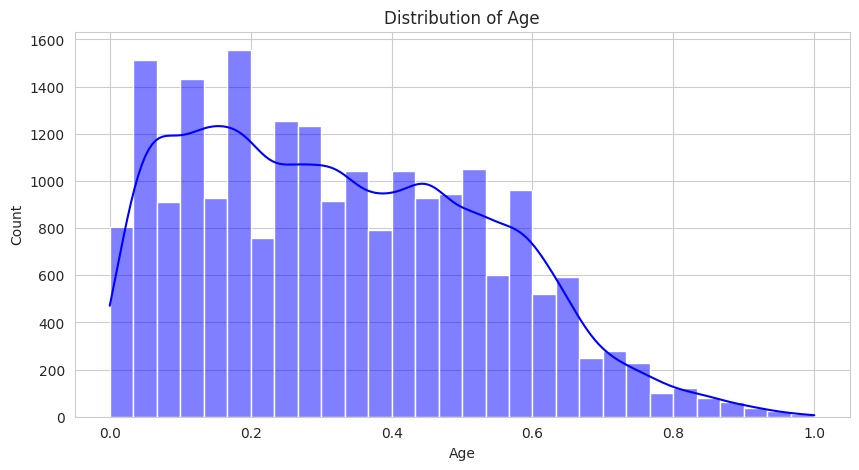

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(cleaned_data['age'], bins=30, kde=True, color='blue')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

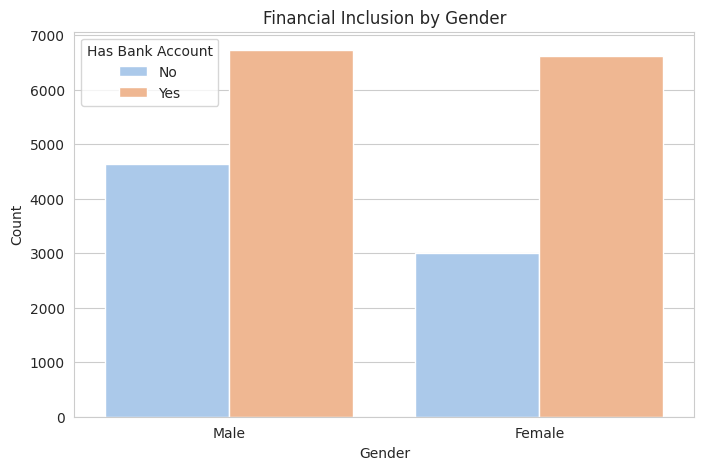

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='female', hue='account', data=cleaned_data, palette='pastel')
plt.xticks([0, 1], ['Male', 'Female'])
plt.title("Financial Inclusion by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Has Bank Account", labels=["No", "Yes"])
plt.show()

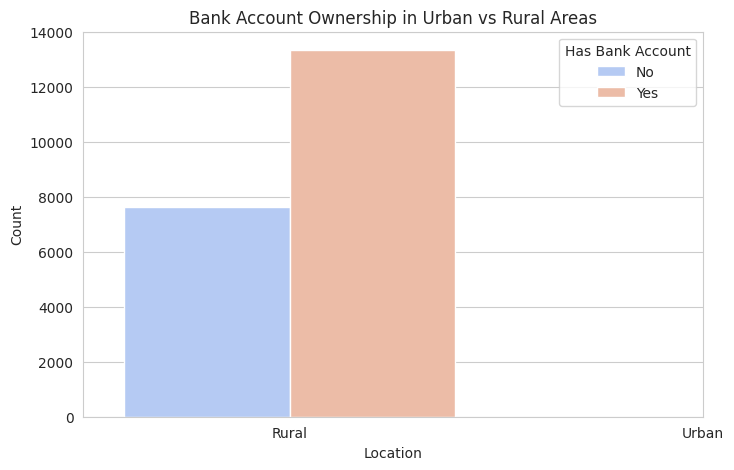

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='urbanicity_f2f', hue='account', data=cleaned_data, palette='coolwarm')
plt.xticks([0, 1], ['Rural', 'Urban'])
plt.title("Bank Account Ownership in Urban vs Rural Areas")
plt.xlabel("Location")
plt.ylabel("Count")
plt.legend(title="Has Bank Account", labels=["No", "Yes"])
plt.show()

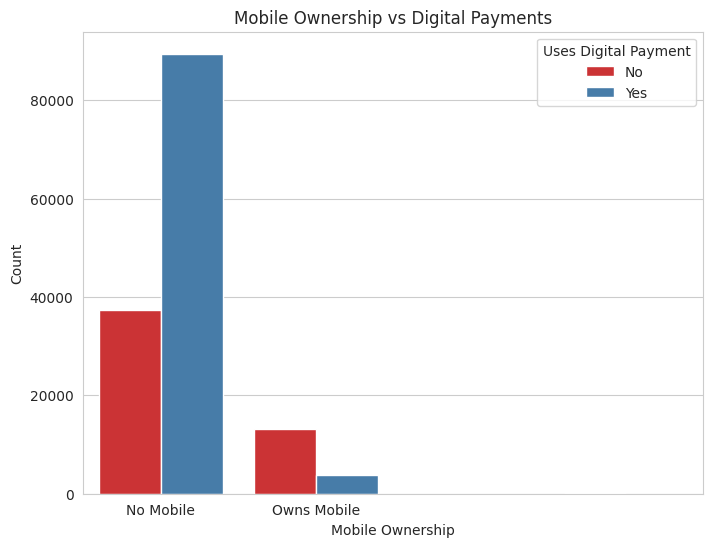

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='mobileowner', hue='anydigpayment', data=data, palette='Set1')
plt.xticks([0, 1], ['No Mobile', 'Owns Mobile'])
plt.title("Mobile Ownership vs Digital Payments")
plt.xlabel("Mobile Ownership")
plt.ylabel("Count")
plt.legend(title="Uses Digital Payment", labels=["No", "Yes"])
plt.show()

Stacked bar chart for bank account ownership by income quintile.


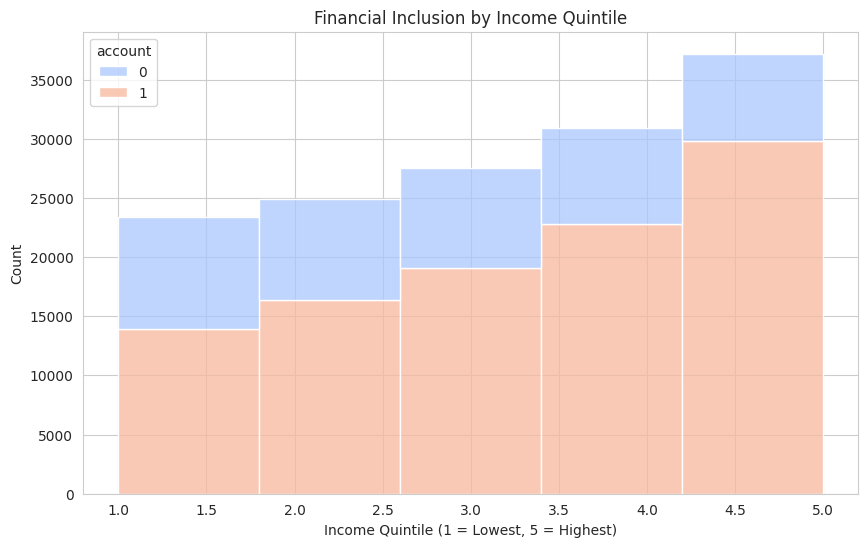

In [ ]:
print('Stacked bar chart for bank account ownership by income quintile.')

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="inc_q", hue="account", multiple="stack", palette="coolwarm", bins=5)
plt.title("Financial Inclusion by Income Quintile")
plt.xlabel("Income Quintile (1 = Lowest, 5 = Highest)")
plt.ylabel("Count")
plt.show()

Violin plot to see how borrowing behavior varies with digital payments.


<ipython-input-100-5d0a9d3a4c26>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='anydigpayment', y='borrowed', data=data, palette='muted')


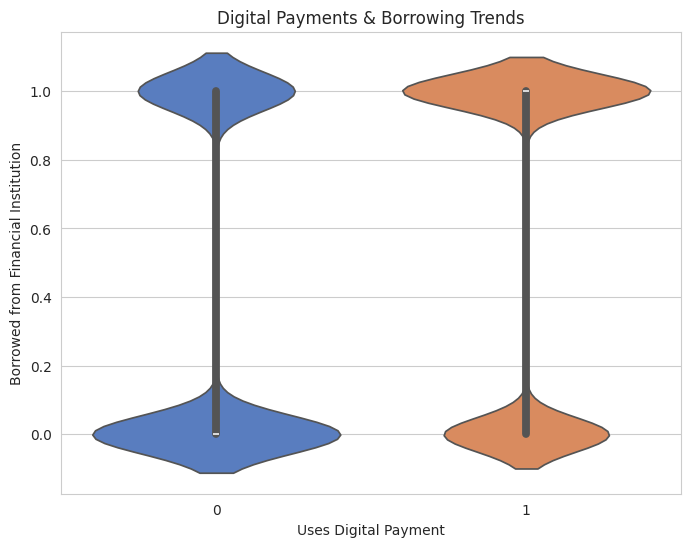

In [ ]:
print('Violin plot to see how borrowing behavior varies with digital payments.')

plt.figure(figsize=(8, 6))
sns.violinplot(x='anydigpayment', y='borrowed', data=data, palette='muted')
plt.title("Digital Payments & Borrowing Trends")
plt.xlabel("Uses Digital Payment")
plt.ylabel("Borrowed from Financial Institution")
plt.show()

<ipython-input-111-2bfe00b97ba8>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x="year", y="anydigpayment", ci=None, marker="o", color="red")


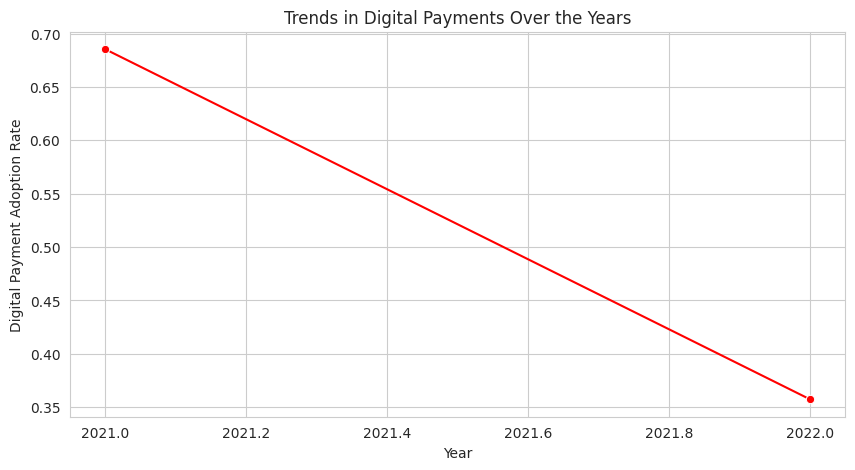

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x="year", y="anydigpayment", ci=None, marker="o", color="red")
plt.title("Trends in Digital Payments Over the Years")
plt.xlabel("Year")
plt.ylabel("Digital Payment Adoption Rate")
plt.show()


In [ ]:
features = ['account', 'receive_transfers', 'receive_pension', 'receive_agriculture',
            'emp_in', 'inc_q', 'mobileowner', 'internetaccess', 'merchantpay_dig',
            'age', 'female', 'urbanicity_f2f']

targets = ['anydigpayment', 'borrowed']

X = cleaned_data[features]
y = cleaned_data[targets]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)


<ipython-input-121-307a721f8966>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette="viridis")


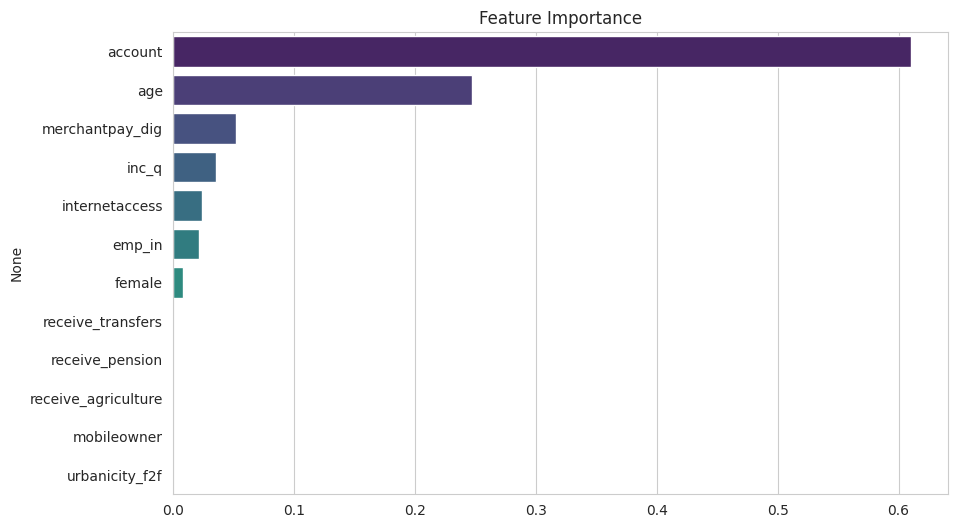

In [ ]:
importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importances.values, y=importances.index, palette="viridis")
plt.title("Feature Importance")
plt.show()

In [ ]:
X_train_scaled = X_train_scaled[:, importances.values > 0.01]
X_test_scaled = X_test_scaled[:, importances.values > 0.01]

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_tuned = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    verbose=1,
    n_jobs=-1
)
rf_tuned.fit(X_train_scaled, y_train)
best_rf = rf_tuned.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)

# Evaluate
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print(f"Optimized Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      2601
           1       0.00      0.00      0.00      1490

   micro avg       0.95      0.64      0.76      4091
   macro avg       0.48      0.50      0.49      4091
weighted avg       0.61      0.64      0.62      4091
 samples avg       0.62      0.48      0.53      4091

Optimized Random Forest Accuracy: 0.6207


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

Model Accuracy: 0.5859

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      2601
           1       0.43      0.35      0.39      1490

   micro avg       0.79      0.76      0.78      4091
   macro avg       0.69      0.67      0.68      4091
weighted avg       0.76      0.76      0.76      4091
 samples avg       0.56      0.54      0.53      4091



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


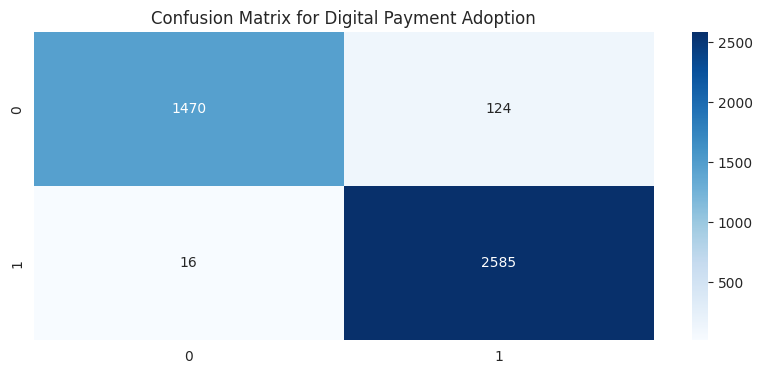

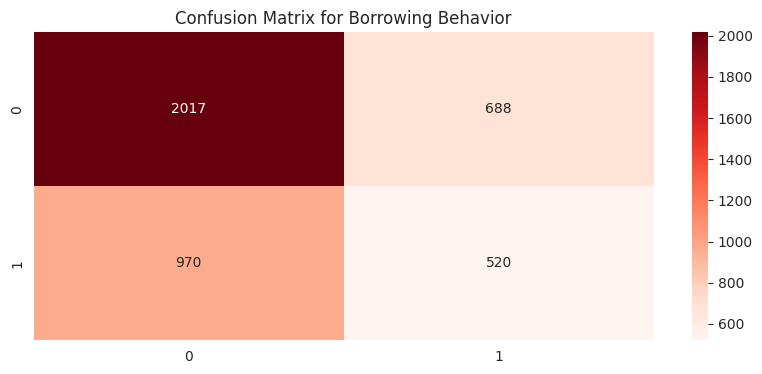

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(10, 4))
sns.heatmap(confusion_matrix(y_test['anydigpayment'], y_pred[:, 0]), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Digital Payment Adoption")
plt.show()

plt.figure(figsize=(10, 4))
sns.heatmap(confusion_matrix(y_test['borrowed'], y_pred[:, 1]), annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix for Borrowing Behavior")
plt.show()